# Task-1: 
### Predict the percentage of marks of an student based on the number of study hours!

### By: Bhaveshkumar Rathod

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid',font='calibri')
%matplotlib inline

In [2]:
data=pd.read_excel(r'student_score.xlsx')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### **Understanding the data**

In [3]:
data.shape

(25, 2)

In [4]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [5]:
data.isnull().any()

Hours     False
Scores    False
dtype: bool

### **Visualizing the data**

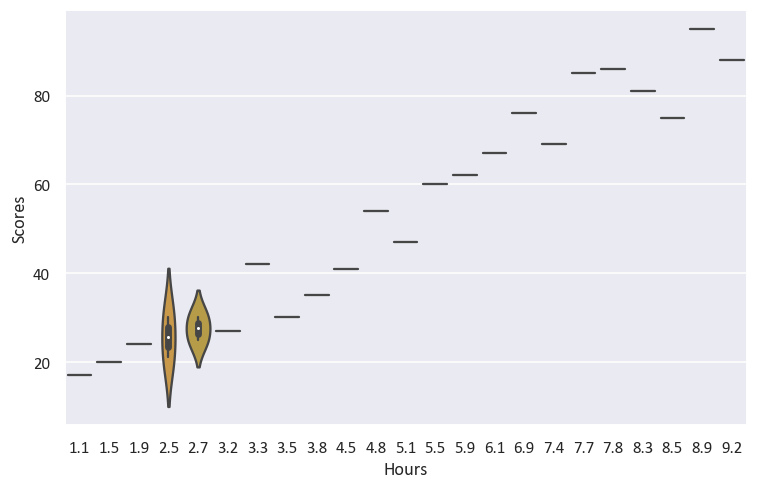

In [6]:
plt.figure(figsize=(8,5),dpi=110)
sns.violinplot(data['Hours'],data['Scores'])
plt.show()

* From the above graph, we can clearly state that students who will study 2.5 or 2.7 hours, they will get percentage score between 20 to 40.
* Students who will study less than 1.5 hours will get 20 or below 20 marks.
* Student who will studey 4.5 or above and less than 5.5 hours, they will get marks between 40 and 60.
* If study hours will be greater than 5.5 and less than 7.5 then the corresponding student marks would be between 60 to 80.
* Student with more than 7.6 hours of study would get marks more than 75.


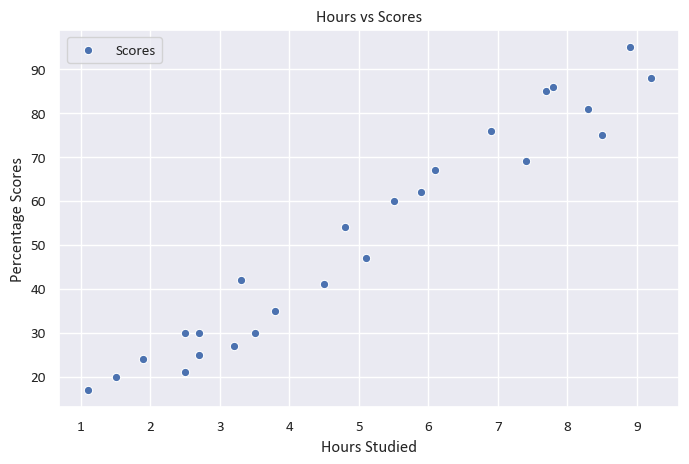

In [7]:
plt.figure(figsize=(8,5),dpi=100)
plt.title('Hours vs Scores')
sns.scatterplot('Hours','Scores',data=data,label='Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.legend()
plt.show()

* <font size=3px>From the above scatterplot we can easily say that there is positive relationship between the number of hours the student studies and the Scores he or she gets as a result.</font>
* <font size=3px>There is a linear relationship that is going above and above.</font>
* <font size=3px>Means the more amount of hours students spend in learning the more they gets better scores.</font>

### **Data Preparation**

In [8]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### **Linear Regression Implementation**

In [10]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

print("Now our model training is completed.")

Now our model training is completed.


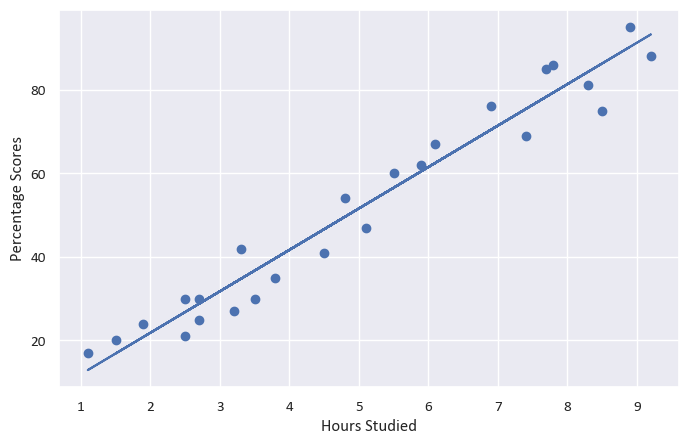

In [11]:
linear_line=reg.coef_ * X + reg.intercept_

plt.figure(figsize=(8,5),dpi=100)
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.scatter(X,y)
plt.plot(X,linear_line)
plt.show()

In [12]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [13]:
y_pred=reg.predict(X_test)
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### **Evaluating the model**
Checking how well our algorithms perform on a dataset.

In [14]:
print("Model Training score: ",reg.score(X_train,y_train))

Model Training score:  0.9515510725211553


In [15]:
print("Model Testing score: ",reg.score(X_test,y_test))

Model Testing score:  0.9454906892105356


In [16]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


### **Saving the model**

In [17]:
import pickle
filename=r'E:\Interships_&_courses\Interships\The sparks foundation\task-1\student_marks_pred.pkl'
pickle.dump(reg,open(filename,'wb'))